In [1]:
!pip install networkx
!pip install scipy
!pip install matplotlib
!pip install pandas

In [2]:
import tweepy
import webbrowser
import time
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
consumer_key = "HO24YC3OXsclTklb9q91rPstc"
consumer_secret = "L4AlvJI2ClgptTEdlHNmgYTgqbrbsjECS9tSySRNiVH5aaLTej"
callback_uri = 'oob' 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
webbrowser.open(redirect_url)
user_pin_input = input("What's the pin value? ")
auth.get_access_token(user_pin_input)

What's the pin value? 2465001


('486977981-9vqd1VTICsY4i1HOFC0eBkvU2JUUXuxmjMS6nwwa',
 'MTNvx5Fuula5Bqwo0iEqP0XMXB5nSgWipbTxtuAw4H4e3')

In [4]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [5]:
me = api.get_user(screen_name = 'MrFlantastic')

In [6]:
me.id

486977981

In [7]:
user_list = ["486977981"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

781


In [8]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 486977981 #Set my user ID as the source 

In [9]:
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

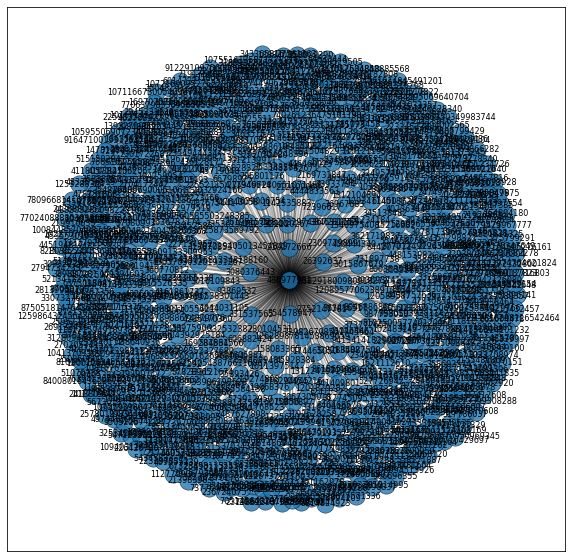

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [11]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 780 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    # fetching the user
    user = api.get_user(userID)

   # fetching the followers_count
    followers_count = user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

1416187149930561537
14
1404854886538301443
2
1888408500
738
1022707063565082624
3853
1370755198994513926
157
31285669
801
389887281
5000
4833056519
3821
1262898781453869059
374
1413156511124103169
22
450331119
2595
12480032
5000
138456252
400
251234726
error
27561363


Rate limit reached. Sleeping for: 872


258
2155481869
576
4777653615
21
1011055621
2063
277073411
2705
1059550690723405824
2509
61896141
5000
881574490639015936
711
58975906
5000
985287670745088001
3235
38494397
5000
1232097506990755840
276
1372374890112716803
210
1305597779729952769
27
779497280651071488
5000
599457344


Rate limit reached. Sleeping for: 892


165
1259864324564307975
error
551584450
1893
1283083350349983744
44
1366020399176286211
3
4665383681
1277
6014732
4523
1188483034598776832
959
1241532312376029185
19
1347743262942126080
1
2794734235
error
1314717996234027014
874
51070738
94
870601003
643
21926861
1652
3188903222


Rate limit reached. Sleeping for: 892


3596
170588918
101
1048662067656445953
475
92636986
5000
487675441
error
1312816298116542464
23889878
2784
1034492180948238337
69
194283025
982
754327532
226
1101211959414980608
87
895647919352578050
108
2271141799
2198
1134171204829548545
223345733
1713
22681759


Rate limit reached. Sleeping for: 890


1823
1301318636108472320
60
1301139230849208322
30
182962260
304
117342623
375
1177968300854304769
10
1164560585503248385
25
241880362
722
770240888803033088
49
706086339201146881
35
1077431534
700
2388174740
14
1180640202798370816
102
72377364
716
3503725935
60
940547452272332800


Rate limit reached. Sleeping for: 889


29
112332715
664
1192807028873404417
409
526812119
error
1360381742
5000
14156206
2062
1463743201
168
346230561
error
298519505
84
318090564
248
1289757904392925184
13
3620071276
275
153112051
54
4863980955
293
2616312002
192
2731365869


Rate limit reached. Sleeping for: 890


105
28169436
404
3000021648
36
3315526335
439
856656292395483136
39
613683872
3132
916970787969601540
28
2259835274
682
912298764441972737
262
1247570993952051200
118
61390803
192
460585313
error
739550692663123969
105
4235470360
1412
1288927673885097984
170
2301722687


Rate limit reached. Sleeping for: 889


601
933303286098223104
257
1387739790
error
916471001931763714
error
236724075
559
2886799429
109
1141053834
122
184928236
51
34023471
21
19839215
750
15216982
5000
54345833
204
1080482190478266368
354
23857857
76
32178071
595
72396617


Rate limit reached. Sleeping for: 888


542
120589587
error
1077206188352327680
12
157855351
1410
1276676847057555456
2606
1280503967160635394
109
1282732974367281153
50
1639006754
5000
897983519108026368
2662
828306601626968064
1725
325342425
692
912291097560469504
101
21116913
error
1210355962986541056
16
234195043
2116
312745095


Rate limit reached. Sleeping for: 888


5000
1208957706238910464
886
464988798
5000
1193841813976682497
205
126436148
error
1187074857093226496
540
861865068
1034
891715866160750592
5000
1161715949189382144
197
2595722186
206
1167786722681376768
136
1340828340
5000
804696226507669504
43
1165232609133309953
1
2373301624
2
2896103447


Rate limit reached. Sleeping for: 886


51
19823328
27
547125932
38
940344595069640704
1045
1006622748393771009
981
708142578
4524
130012944
382
1209359622
5000
1156733349727260672
14
1136625974236155904
48
1156617754625155072
277
47176191
199
1127235259475611648
250
3317256518
53
770637983309565953
72
286693928


Rate limit reached. Sleeping for: 886


181
4495243283
575
707219405013454849
489
168009390
364
471159384
3594
966696355
error
94141566
5000
169394603
143
1126473869148213252
81
20116932
728
41180571
error
210272666
error
73776463
3214
249999508
1575
24128531
998
346049442


Rate limit reached. Sleeping for: 885


52
815608362
651
419747701
1866
3012139911
449
164353221
677
2834622722
805
104259954
5000
19068376
1511
1201829282
2298
885445640
4808
3670615401
73
1094031169258172418
2
393693741
1039
1081676154212364289
16
914443974764621824
858
3080376443


Rate limit reached. Sleeping for: 884


68
431056972
80
1075593980476313600
12
463442451
299
609087133
error
204424429
542
2409689604
177
794594292
1233
3548194096
412
1075516135871778816
393
219910033
109
3974509757
743
772494782111154177
83
2151384888
556
2714681548
error
1072169095276228608


Rate limit reached. Sleeping for: 884


541
1071166730054090752
4
24067286
5000
1340975408
114
613914527
359
1065031848584196097
891504829
254
247497799
562
354578947
100
40683029
5000
373772655
31
883436283028275200
200
2715773650
184
877012491963961344
91
3292012480
382
43253719


Rate limit reached. Sleeping for: 882


1359
410388818
82
2873805031
932
763941365025607680
303
3350101361
5000
70429766
123
485266632
66
1029123933906198528
error
1616782380
44
816257537729327104
14
22114745
721
41038250
733
1033388790293975041
29
1031260003263565824
419
1031879310578278401
149
331537565


Rate limit reached. Sleeping for: 883


149
879829952001998848
5000
825086290710429697
error
38425511
3261
1018587936621780993
47
21398398
43
26392637
error
61913683
216
2148313468
17
2343123083
62
3128299056
46
211346614
208
1253288304
317
2702057415
155
515150294
2208
2594510406


Rate limit reached. Sleeping for: 883


502
3306301502
237
212710105
5000
1016714337866563586
2
982397997576347649
155
1008448570498748416
159
1087037455
321
322782551
5000
33923443
5000
856334009584033798
error
883382665
error
104358108
5000
369352648
5000
1001978988674379776
31
63796828
5000
474127946


Rate limit reached. Sleeping for: 881


194
941341418290892800
54
998619392811421696
477
56730137
5000
633560864
356
39346140
939
169284861
error
798593048
454
637301864
43
2911851718
199
851855964
3849
381098458
42
512165772
281
33603957
200
57080993
315
844207771


Rate limit reached. Sleeping for: 879


581
133369464
923
636409948
1059
765355350
535
886026310300160000
275
497448591
402
548657816
965
343365816
735
3315587549
107
1672323726
1694
333121674
error
35833757
185
890815164605276161
526
141416486
1188
27428049
376
36967683


Rate limit reached. Sleeping for: 880


196
774639346410369024
1155
930345348714909697
544
216978480
245
37510542
362
101776647
2194
358602374
102
494036265
49
70454216
137
977747860413407233
84
275799291
15
1335008648
error
234132202
378
227134952
187
1460423100
289
4831073007


Rate limit reached. Sleeping for: 878


709
367278747
82
3386545992
481
3283975956
194
77592409
262
766910774
error
1332792588
1019
3192628258
67
819738218119753728
203
2752147781
613
2849311514
5000
205785954
75
2848648035
168
944472026
455
747438338
742
438640936


Rate limit reached. Sleeping for: 876


137
888911022882422785
207
2180485405
397
378581484
1584
67828965
97
154894180
error
2353619409
1104
1658391625
1336
840468576
9
73933794
5000
889322168424779777
18
3311994782
778
830570303201931267
23
4831465174
842
312809460
3039
838291800980918272


Rate limit reached. Sleeping for: 878


48
219274808
28
739733446415683585
745
161501344
107
17156145
191
1485782671
377
1611397514
393
225521154
31
795801176
72
192907472
507
606882424
661
731897738
1240
221393687
3947
325143109
528
1118012288
3645
741621105350324224


Rate limit reached. Sleeping for: 876


1135
381517385
428
311628317
5000
174465050
1242
74759973
3758
2668531515
642
213421329
25
353383284
5000
441409801
191
736951584
5000
886787309894553600
197
875051814764367874
76
23222138
3115
561102728
1101
2165584138
452
472432929


Rate limit reached. Sleeping for: 875


188
64630444
326
3022708974
359
265035409
65
64870402
3803
396405522
error
112779906
123
20704242
161
381214995
3162
421610696
259
2465338406
error
365223466
error
558171887
32
250860609
178
261981579
485
4828259713


Rate limit reached. Sleeping for: 878


476
2994002565
410
210897756
1946
704091914845491201
264
3366176915
92
76224496
345
456335974
151
2246858662
264
249508907
error
70970151
279
2436880951
5000
415844279
11
226426700
error
610067519
1147
2992528480
822
35893426


Rate limit reached. Sleeping for: 876


error
946427754
error
1080115375
435
256662360
583
571452585
error
311768523
680
1940901667
255
220207373
436
309462920
1159
738533725873569792
409
2504819123
5000
776995940
252
3043973260
5000
40560852
1788
2781139889
258
1581831325


Rate limit reached. Sleeping for: 877


128
72767883
5000
67870178
25
357298321
337
229380399
342
1271013866
5000
416424914
618
61771891
5000
47830854
5000
557972175
5000
2895898625
741
3296535763
error
2467102849
42
319392982
457
840080164360867841
7
144548707


Rate limit reached. Sleeping for: 873


3529
841796311468912640
14
547916560
5000
740261236475101190
5000
295302727
1639
828036224455680007
647
768867900061061120
325
806316767119376384
430
425144154
152
825405438766116867
6
527726942
167
823304950528831489
3
2309779899
5000
816107764145647616
5
815016813348188160
226
425196776


Rate limit reached. Sleeping for: 870


1394
810250057740120064
22
379775369
error
446460023
49
634397554
112
762060670950969345
1149
780966814167760896
23
554658256
error
280682278
4140
2686194151
5000
405005884
624
462602118
3109
46839997
5000
233846112
1235
714225113399308288
1622
517786037


Rate limit reached. Sleeping for: 873


11
351725373
1336
741082634843885568
3
256171033
78
45422317
error
729826708501745664
640
819008719
56
182590542
error
482564009
error
817715540
29
1041370956
114
18485722
5000
37235773
2
3307327669
5000
1621112610
2692
51234184


Rate limit reached. Sleeping for: 873


450
3167900950
185
4742033357
70
705145648291643393
278
701254529191387136
193
700822164983795712
183
701133592118820865
8
236840752
76
269133416
208
2975793087
108
103207643
915
4144513877
477
344529154
324
4874298581
4
3656090837
217
1972412216


Rate limit reached. Sleeping for: 867


707
3316794400
286
404965713
5000
4444833563
23
22068120
error
604632530
268
4769979579
19
169633368
139
2704172442
4034
4628095888
6
3059436562
897
4640543475
36
133886193
143
389849875
149
4437757636
513
2918088023


Rate limit reached. Sleeping for: 868


3766
146182808
error
4197439947
6
456248396
582
2242368201
17
3904334248
error
2483141913
error
4353261136
896
33711818
27
4268018061
4
15800897
580
3664606881
error
190546644
error
37034348
81
3215432457
312
4161861737


Rate limit reached. Sleeping for: 875


126
320509864
1426
276994209
205
61633032
950
3093338464
374
219175408
603
2945231130
869
102483145
1873
3958786407
397
547193389
331
3644267356
232
360770812
20
3846320565
125
3814824923
2
43046446
1479
32495749


Rate limit reached. Sleeping for: 866


65
3621719837
4
3148176621
237
573912950
491
30650224
5000
413670853
174
1017504858
46
1009978129
91
1644031105
579
70888575
209
1059503869
43
3403597293
5000
545300712
error
1863593143
1760
202681047
389
14781086


Rate limit reached. Sleeping for: 866


162
587534566
37
224101232
error
1072398817
491
23723693
25
2379862393
5000
413406638
32
2885524983
39
478731868
102
386620215
error
30268397
305
16981385
1099
18548136
5000
158083365
2113
436128171
error
3355589357


Rate limit reached. Sleeping for: 869


138
3340635011
error
241700729
3488
1355965338
126
288830829
1248
52479182
2804
56392235
error
3261743343
624
3078173966
545
171660313
446
14664225
96
413877551
1503
229943775
error
1286109805
68
382086103
36
452307340


Rate limit reached. Sleeping for: 869


error
2979163606
error
2487627808
346
1636782774
298
24118916
909
145330238
433
1312241972
250
3081998068
2768
598808257
3286
253882717
348
259535006
322
3067305018
error
224997660
1519
79181700
151
581373245
888
3046886865


Rate limit reached. Sleeping for: 869


123
3015867679
83
3021410030
245
28778614
533
1697075766
5000
55879483
5000
255691210
561
3016109843
376
755199384
1232
2337139178
1572
700227677
410
106253569
2477
1325690233
error
264335792
837
2984884203
error
2354944434


Rate limit reached. Sleeping for: 866


error
1497451250
error
190877396
3373
2967835289
340
472375861
error
421404506
1630
280817248
error
307218366
772
252332144
error
346351578
216
402768122
380
319729969
968
45719048
470
2877571336
36
302220267
163
562286594


Rate limit reached. Sleeping for: 871


52
2657253387
231
2813992073
65
2278228675
99
542003641
321
2360305028
151
2780213482
37
521341227
373
1954871731
9
800358534
61
552318366
491
26466364
1049
17628471
415
93869532
1802
83502792
89
347035334


Rate limit reached. Sleeping for: 860


853
2171605719
87
2364490940
483
863810917
error
253944050
453
1125927619
594
553087472
1579
1312104894
903
328288408
627
243006551
5000
45928384
890
412687140
error
95052257
811
2317543057
74
21025630
1382
1328914758


Rate limit reached. Sleeping for: 864


5000
367325997
534
257179857
error
2578019779
error
895369100
1191
2558184121
error
448153982
310
212309060
1807
2546023396
14
223481664
2375
160838330
1688
2230517322
283
404579322
40
589315087
70
303988630
error
270913447


Rate limit reached. Sleeping for: 868


error
2463819270
1
1390425896
326
309322279
520
818431566
5000
322326778
1128
332532382
1871
299187823
716
595164057
5000
188579535
293
409502018
error
369866282
665
479146881
5000
610340164
error
202256715
1055
2313079737


Rate limit reached. Sleeping for: 865


140
503441835
772
277202798
454
467060479
1130
445208095
411
229927287
509
1485716304
160
2266591494
54
2228266803
error
2224590945
error
2231978371
9
385095165
682
1135798327
53
2218551978
54
377648276
286
2169731847


Rate limit reached. Sleeping for: 856


19
2149041027
440
1425967777
error
1393271905
473
178778347
1040
1722979519
error
453553010
5000
445194817
error
90280361
error
346906833
5000
1552331641
15
364650440
592
295822346
106
337412608
498
318779414
70
579386299


Rate limit reached. Sleeping for: 859


326
1352288329
error
1135827500
114
1293411450
195
22507981
37
1226737753
14
415182592
89
872614861
10
1142535883
2
1146777138
13
1118090388
91
1115289313
22
292033050
66
872407262
315
987753050
error
402363449


Rate limit reached. Sleeping for: 858


322
412777906
error
987870608
202
345138482
268
278294945
125
590216959
85
298344609
163
32924166
292
355607196
488
424694339
error
865604478
171
422113144
388
433813993
56
116070456
112
760395198
64
759883766


Rate limit reached. Sleeping for: 855


103
95797981
510
303829497
98
624908555
614018726
104
363486517
error
313664880
error
409555239
error
332596799
151
67323850
error
291408129
18
543001306
261
353433420
436
294053343
328
536828327
1116
566585429


Rate limit reached. Sleeping for: 866


172
66396283
error
287971151
381
528096559
431
280104531
480
514996512
68
301057332
328
347643058
345
383975239
308
286735476
458
400444340
306
433809537
123
288863878
error
273278340
177
301162978
error
66798975


Rate limit reached. Sleeping for: 864


316
287438603
192


In [14]:
df = pd.read_csv("networkOfFollowers.csv") #Read into a df
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [15]:
G.number_of_nodes() #Find the total number of nodes in this graph

505416

In [17]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

nconst  degree
0  3.392344e+07    5095
1  2.406729e+07    5085
2  4.783085e+07    5075
3  2.379862e+09    5065
4  1.697076e+09    5065

In [45]:
u = api.get_user(33923443)
u.screen_name

'6BillionPeople'

In [31]:
G_tmp = nx.k_core(G, 10) #Exclude nodes with degree less than 10

In [37]:
!pip install community
!pip install python-louvain

     |████████████████████████████████| 204 kB 2.2 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9413 sha256=0c475b5e9ee93d35e788a82777dd50a51cbed7fbcd78fea514b77f5b8383b979
  Stored in directory: /Users/MFlanagan/Library/Caches/pip/wheels/5a/f5/b9/2b37cd2ef0d5a3388179f2b48a6d4f2e8419abbf4213566ec1
Successfully built python-louvain


In [38]:
from community import community_louvain
partition = community_louvain.best_partition(G_tmp)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [39]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

In [42]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")
combined.head

<bound method NDFrame.head of              names  degree  group
0     1.621113e+09     704    4.0
1     2.704172e+09     679    4.0
2     4.049657e+08     667    4.0
3     9.386953e+07     561    4.0
4     1.863593e+09     551    4.0
...            ...     ...    ...
3305  1.109199e+18      10    3.0
3306  1.027081e+18      10    2.0
3307  2.918891e+08      10    4.0
3308  3.462758e+08      10    3.0
3309  2.356592e+08      10    3.0

[3310 rows x 3 columns]>

ValueError: 'c' argument has 3310 elements, which is inconsistent with 'x' and 'y' with size 3288.

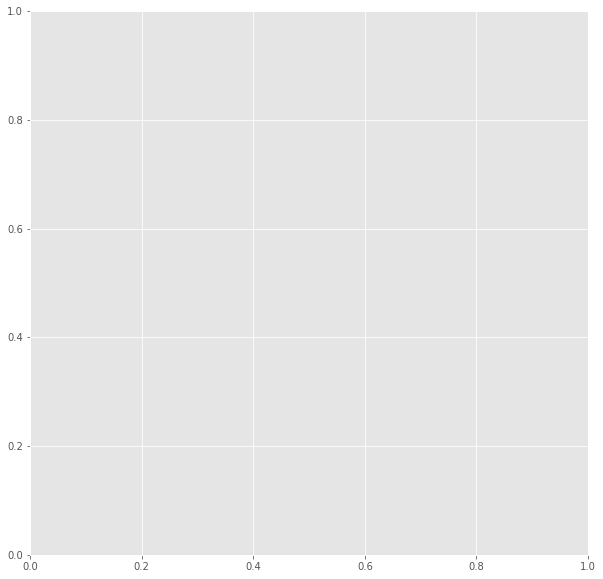

In [43]:
pos = nx.spring_layout(G_tmp)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
#cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(G_tmp, pos,
                                cmap=plt.cm.Set1,
                                node_color=combined['group'],
                                alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('twitterFollowers.png')

In [44]:
combined = combined.rename(columns={"names": "Id"}) #Gephi really likes when your node column is called 'Id'
edges = nx.to_pandas_edgelist(G_tmp)
nodes = combined['Id']

edges.to_csv("edges.csv")
combined.to_csv("nodes.csv")